# Python Tensorflow CNN
### pooling

지난번 필터를 활용하여 conv2d 레이어층을 만들어 적용시켰었다.   
CNN흐름에서 도출된 레이어층을 샘플링(풀링)한다.   
풀링의 종류는 평균풀링과 맥스풀링이 존재하며,    

maxpooling이 많이 쓰인다.

### 모듈세팅

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

### maxpooling 실습
padding X

In [19]:
#2*2테스트 이미지 생성, image의 텐서의 각 값은 아래와 같음

image = tf.constant([[[[1],[2]],
                    [[6],[4]]]], dtype=np.float32)

#maxpool2D연산을 수행한다
#pool_size2, strides=1, padding X
pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='VALID')(image)
print(pool.shape)
print(pool.numpy())

(1, 1, 1, 1)
[[[[6.]]]]


padding O

In [20]:
#2*2테스트 이미지 생성, image의 텐서의 각 값은 아래와 같음

image = tf.constant([[[[1],[2]],
                    [[6],[4]]]], dtype=np.float32)

#maxpool2D연산을 수행한다
#pool_size2, strides=1, padding O
pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='SAME')(image)
print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
[[[[6.]
   [4.]]

  [[6.]
   [4.]]]]


### conv -> pooling 실습

mnist data활용

In [21]:
#mnist데이타 호출
mnist = keras.datasets.mnist
class_names = ['0','1','2','3','4','5','6','7','8','9']

### 데이타 세팅

In [22]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### 데이타 확인

In [23]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [24]:
print(train_images[0].shape)
print(train_images)

(28, 28)
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


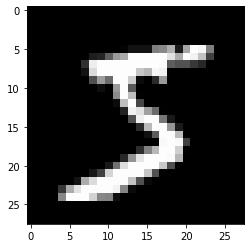

In [25]:
img = train_images[0]
plt.imshow(img, cmap='gray')
plt.show()

### 데이타 정규화
텐서의 값을 0~1사이의 값으로 정규화 시킨다

In [53]:
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

### 데이터 확인
정규화를 해도 데이터이미지는 동일하다
train_images의 이미지 1개만 사용함

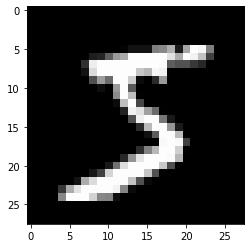

In [54]:
img = train_images[0]
plt.imshow(img, cmap='gray')
plt.show()

In [55]:
img.shape

(28, 28)

### conv2d레이어 연산
이미지를 4차원으로 변환한 후 작업한다

image.shape, 배치size, 세로, 가로, 채널 (1, 28, 28, 1)
conv2d.shape , 배치size, 세로, 가로, 채널  (1, 14, 14, 5)


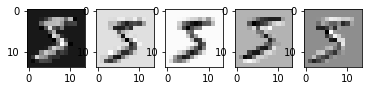

In [56]:
#4차원으로 변환
#배치size, 세로, 가로, 채널로 4차원으로 만들어 줘야함
#배치size를 -1로 하면, 자동으로 입력이 된다.
#이 경우 이미지 1장만 사용하기 때문에 1로 됨
#채널은 색상 (그레이) 한가지만 사용하기 때문에 1임
img = img.reshape(-1,28,28,1)
print("image.shape, 배치size, 세로, 가로, 채널", img.shape)
img = tf.convert_to_tensor(img)


#필터로 사용하기위해 랜덤값으로 init값 설정
weight_init = keras.initializers.RandomNormal(stddev=0.01)


#필터5개, 커널사이즈(필터사이즈)3*3, strides:2*2, 패딩 사용
conv2d = keras.layers.Conv2D(filters=5, kernel_size=3, strides=(2, 2), padding='SAME', 
                             kernel_initializer=weight_init)(img)


print("conv2d.shape , 배치size, 세로, 가로, 채널 ",conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(14,14), cmap='gray')
plt.show()

### pooling layer 연산

pool.shape , 배치size, 세로, 가로, 채널 (1, 7, 7, 5)


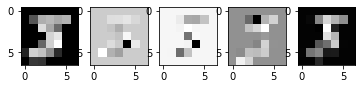

In [57]:
#pooling size 2*2
#strides 2
#padding O
#입력값 conv2d
pool = keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')(conv2d)
print("pool.shape , 배치size, 세로, 가로, 채널", pool.shape)

feature_maps = np.swapaxes(pool, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(7, 7), cmap='gray')
plt.show()

이후 fully Connected layer연산을 진행한다.   

pooling가 완료된 레이어를 flat해주고, 출력값을 도출하고 softmax등의 연산을 거치게 된다.